In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
corpus = "clef" 
judges = "temps_"
v2 = True
k = 10
# njudges = int(judges[0])

In [139]:
scores = pd.read_csv(f"controversy_results/controversy_scores_{judges}{corpus}.csv")

if v2:
    scores.loc[:, "topic"] = scores["topic"].astype("str")
    scores = scores[(scores["topic"].str.endswith("4")) | (scores["topic"].str.endswith("5")) | (scores["topic"].str.endswith("6"))]
    scores.reset_index(drop=True, inplace=True)
    corpus = "clef_v2"

scores

,topic,score1,score2,score3,score4,score5
0,101004,3,2,2,3,3
1,101005,2,2,2,2,3
2,101006,3,3,3,3,3
3,102004,2,2,2,3,2
4,102005,2,2,2,2,2
...,...,...,...,...,...,...
145,149005,2,2,2,2,2
146,149006,3,3,3,3,3
147,150004,4,3,4,4,4
148,150005,2,3,2,2,3


In [140]:
scores.describe()

,score1,score2,score3,score4,score5
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.706667,2.686667,2.653333,2.673333,2.726667
std,0.908917,0.963332,0.897324,0.908548,0.954654
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,5.000000,5.000000,4.000000,5.000000


In [141]:
# Compute the standard deviation for each row (excluding 'topic' column)
row_std = scores.iloc[:, 1:].std(axis=1)

# Compute the average of these standard deviations
row_std.mean()

0.18969771090851903

In [142]:
if judges != "":
    scores["score"] = scores[["score1", "score2", "score3", "score4", "score5"]].sum(axis=1)
    scores["score0-5"] = scores["score"] / 5

In [143]:
df = scores.sort_values(by="score", ascending=False)
df = df.reset_index(drop=True)
df

,topic,score1,score2,score3,score4,score5,score,score0-5
0,112006,4,5,4,4,5,22,4.4
1,118006,4,4,5,4,4,21,4.2
2,128004,4,4,4,4,4,20,4.0
3,148005,4,4,4,4,4,20,4.0
4,137006,4,4,4,4,4,20,4.0
...,...,...,...,...,...,...,...,...
145,146004,1,1,1,1,1,5,1.0
146,145006,1,1,1,1,1,5,1.0
147,135004,1,1,1,1,1,5,1.0
148,121005,1,1,1,1,1,5,1.0


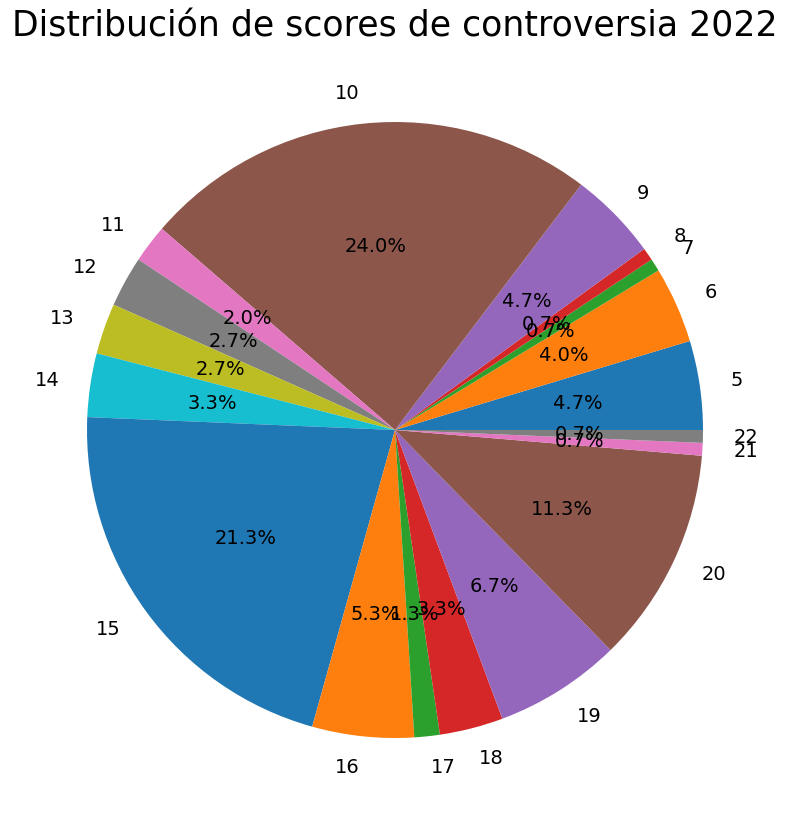

In [144]:
# Group by score and count the number of topics in each score group
df_grouped = df.groupby('score').count()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={"topic": "count"})

# Do a pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_grouped['count'], labels=df_grouped['score'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribución de scores de controversia 2022', fontsize=25)
plt.show()

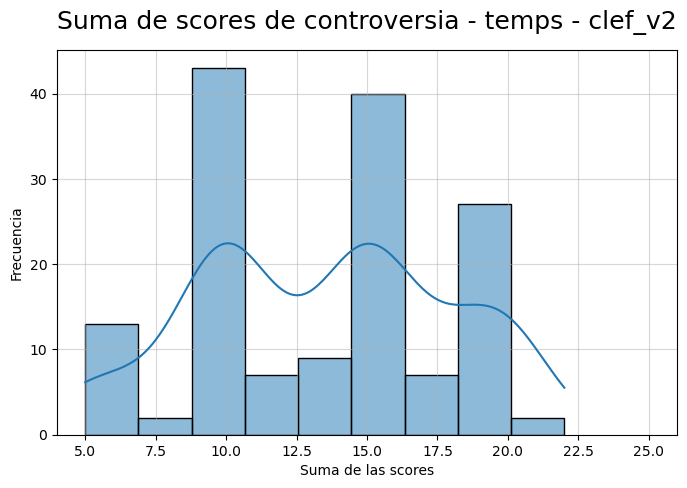

In [145]:
plt.figure(figsize=(8, 5))
sns.histplot(df['score'], kde=True)
plt.xlabel(f"Suma de las scores")
plt.xlim(4, 26)
plt.ylabel("Frecuencia")
plt.title(f"Suma de scores de controversia - temps - {corpus}", fontsize=18, pad=15)
plt.grid(True, alpha=0.5)

plt.show()

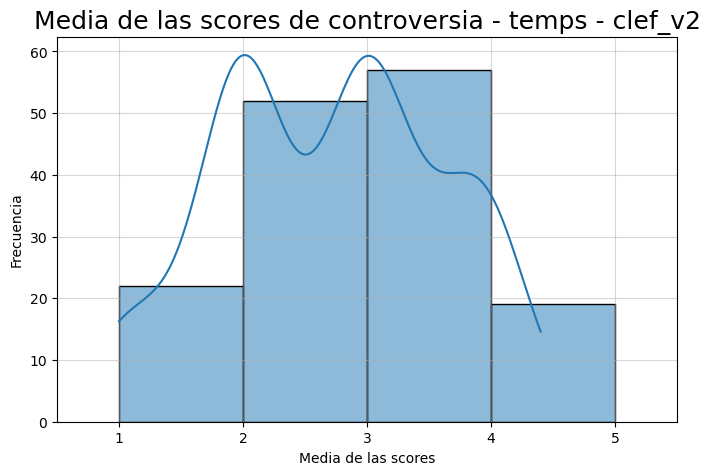

In [146]:
plt.figure(figsize=(8, 5))
bin_edges = [1, 2, 3, 4, 5]
sns.histplot(df['score0-5'], kde=True, bins=bin_edges)
plt.xlabel(f"Media de las scores")
plt.ylabel("Frecuencia")
plt.xlim(0.5, 5.5)
plt.title(f"Media de las scores de controversia - temps - {corpus}", fontsize=18)
plt.grid(True, alpha=0.5)

plt.show()

In [147]:
# harmful_at_k_2020 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2020_bm25.csv')
# harmful_at_k_2021 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2021_bm25.csv')
# harmful_at_k_2022 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2022_bm25.csv')
# harmful_at_k_clef = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_bm25.csv')
# harmful_at_k_clef_v2 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_v2_bm25.csv')

harmful_at_k_2020 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2020_minilm12.csv')
harmful_at_k_2021 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2021_minilm12.csv')
harmful_at_k_2022 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2022_minilm12.csv')
harmful_at_k_clef = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_minilm12.csv')
harmful_at_k_clef_v2 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_v2_minilm12.csv')


harmfuls_at_k = {"2020": harmful_at_k_2020, "2021": harmful_at_k_2021, "2022": harmful_at_k_2022, "clef": harmful_at_k_clef, "clef_v2": harmful_at_k_clef_v2}

In [148]:
harmful_at_k_clef_v2

,topic,harmful_at_10
0,101004,0.0
1,101005,0.0
2,101006,0.0
3,102004,0.3
4,102005,0.2
...,...,...
145,149005,0.0
146,149006,0.1
147,150004,0.2
148,150005,0.1


In [149]:
harmfuls_at_k[corpus][f"score0-5"] = df[f"score0-5"]
harmfuls_at_k[corpus]

,topic,harmful_at_10,score0-5
0,101004,0.0,4.4
1,101005,0.0,4.2
2,101006,0.0,4.0
3,102004,0.3,4.0
4,102005,0.2,4.0
...,...,...,...
145,149005,0.0,1.0
146,149006,0.1,1.0
147,150004,0.2,1.0
148,150005,0.1,1.0


In [150]:
harmfuls_at_k[corpus].corr(method="pearson")
    

,topic,harmful_at_10,score0-5
topic,1.000000,-0.060722,-0.979144
harmful_at_10,-0.060722,1.000000,0.071817
score0-5,-0.979144,0.071817,1.000000


In [151]:
harmfuls_at_k[corpus].corr(method="kendall")

,topic,harmful_at_10,score0-5
topic,1.000000,-0.029045,-0.933924
harmful_at_10,-0.029045,1.000000,0.028886
score0-5,-0.933924,0.028886,1.000000


In [152]:
harmfuls_at_k[corpus].corr(method="spearman")

,topic,harmful_at_10,score0-5
topic,1.000000,-0.037678,-0.987024
harmful_at_10,-0.037678,1.000000,0.034920
score0-5,-0.987024,0.034920,1.000000
